# Consistency, Stability, Convergence

**강좌**: *기초 전산유체역학*

## Accuracy

Central Difference와 Upwind difference로 Wave equation을 해석한 기법의 정확도를 비교해보자.
Taylor expansion을 이용하면 다음 관계를 얻을 수 있다.

$$
u_j^{n+1} = u_j^n + u_t \Delta t+ \frac{1}{2!} u_{tt} \Delta t^2 + \frac{1}{3!} u_{ttt} \Delta t^3 +...
$$

$$
u_{j+1}^n = u_j^n + u_x \Delta x + \frac{1}{2!} u_{xx} \Delta x^2 + \frac{1}{3!} u_{xxx} \Delta x^3 +...
$$

$$
u_{j-1}^n = u_j^n - u_x \Delta x + \frac{1}{2!} u_{xx} \Delta x^2 - \frac{1}{3!} u_{xxx} \Delta x^3 +...
$$

### Central scheme
First approach (Euler Explicit + Central difference) 에 이 결과를 적용하면 다음과 같다.

$$
u_t + a u_x = - \frac{\Delta t}{2} u_{tt} - \frac{a \Delta x^2}{6} u_{xxx} + O(\Delta t^2, \Delta x^3) = O(\Delta t, \Delta x^2) .
$$

즉 시간에 대해서는 1차 정확도, 공간에 대해서는 2차 정확도를 갖는다.

### Upwind scheme
Second approach (Euler Explicit + Upwind) 에 이 결과를 적용하면 다음과 같다.

$$
u_t + a u_x = - \frac{\Delta t}{2} u_{tt}  + \frac{a \Delta x}{2} u_{xx} + O(\Delta t^2, \Delta x^2) = O(\Delta t, \Delta x) .
$$

즉 시간과 공간에 대해 1차 정확도를 갖는다.

### Consistency
$\Delta x, \Delta t \rightarrow 0$ 일 때 차분식이 미분방정식과 같아지는 경우 이 기법이 Consistent 하다. Central scheme 과 Upwind scheme 모두 Consistent 하다.

### Modified Equation
Upwind 또는 Central scheme의 경우 시간에 대한 미분 항 $u_{tt}$ 을 다음과 같이 변형할 수 있다.

$$
u_t = - au_x  + O(\Delta t, \Delta x)\\
u_{tt}  = -au_{xt} + O(\Delta t, \Delta x)
$$

여기서 $u_{xt}=u_{tx}$ 이므로 

$$
u_{tt} = -a u_{xt} = -a u_{tx} = -a \frac{\partial}{\partial x} \left (
-a u_x + O(\Delta t, \Delta x) 
\right ) = a^2 u_{xx} + O(\Delta t, \Delta x)
$$

Upwind scheme에 이를 적용하면

$$
u_t + a u_x = \frac{a \Delta x}{2} u_{xx} \left ( -a \frac{\Delta t}{\Delta x} + 1 \right) + O(\Delta t^2, \Delta x^2, \Delta t \Delta x) 
= \frac{a \Delta x}{2} u_{xx} (1 - \nu) + O(\Delta t^2, \Delta x^2, \Delta t \Delta x)
$$

$\Delta x, \Delta t \rightarrow 0$ 이므로, 가장 크기가 큰 첫번째 오차항까지 생각하면, Upwind 기법은 다음과 같이 근사할 수 있다.

$$
u_t + a u_x = \epsilon u_{xx}
$$

$\epsilon > 0$ 일 때  $\epsilon u_{xx}$ 은 작은 점성항과 같은 역활을 해서 시간이 지날수록 수치적인 해가 감쇄한다.

- (DIY) Central 기법에 대해 modified equation을 구해보시오.

### Stability

Central scheme의 경우 정확도가 높음에도 시간이 지날 수록 해의 진폭이 점점 커져서 발산한다.

이는 수치 해석 기법의 안정성과 관계가 있다.

### von Neumann Stability Analysis

선형 방정식이고, Periodic 경계 조건에 대해서 차분식의 수치 안정성은 von Neumann 안정성 분석으로 판단할 수 있다.

완전해를 $D$ 라 했을 때 수치해 $N$은 다음과 같이 나타낼 수 있다.

$$
N = D + \epsilon.
$$

여기서 $\epsilon$ 은 round-off 에 의한 error 이다.

차분식에 이를 적용하면 오차에 대한 식을 구할 수 있다. 

#### Central scheme
차분식에 완전해를 적용하면

$$
\frac{D_j^{n+1} + \epsilon_j^{n+1} - D_{j}^n - \epsilon_j^{n}}{\Delta t} + \frac{a (D_{j+1}^n + \epsilon_{j+1}^{n} - D_{j-1}^n - \epsilon_{j-1}^{n})}{2 \Delta x} = 0.
$$

완전해는 차분식에 대한 오차가 없으므로,

$$
\frac{\epsilon_j^{n+1} - \epsilon_j^{n}}{\Delta t} + \frac{a (\epsilon_{j+1}^{n} - \epsilon_{j-1}^{n})}{2 \Delta x} = 0.
$$

이 때 오차를 아래와 같이 표현하자.

$$
\epsilon_j^n = \sigma^n e^{ikx_j}
$$

즉 오차는 공간에 대해 $2 \pi / k$의 주기를 갖는 형태이다. 이를 오차에 대한 차분식에 적용하면

$$
\frac{\sigma^{n+1} e^{ikx_j} - \sigma^n e^{ikx_j}}{\Delta t} + \frac{a (\sigma^n e^{ik(x_j + \Delta x)} - \sigma^n e^{ik(x_j - \Delta x)})}{2 \Delta x} = 0.
$$

$\sigma^n e^{ikx_j}$ 를 각 변에 나누어서 정리하면

$$
\sigma = 1 - \frac{a \Delta t}{\Delta x} (i \sin (\Delta x))
$$

Central scheme은 $|\sigma| > 1$ 이므로 오차가 증폭된다. 즉 불안정하다.

#### Upwind scheme
Upwind 차분식에 완전해를 적용하면

$$
\frac{D_j^{n+1} + \epsilon_j^{n+1} - D_{j}^n - \epsilon_j^{n}}{\Delta t} + \frac{a (D_{j}^n + \epsilon_{j}^{n} - D_{j-1}^n - \epsilon_{j-1}^{n})}{\Delta x} = 0.
$$

오차에 대한 식은 다음과 같다.

$$
\frac{\epsilon_j^{n+1} - \epsilon_j^{n}}{\Delta t} + \frac{a (\epsilon_{j}^{n} - \epsilon_{j-1}^{n})}{\Delta x} = 0.
$$

오차를 주기 형태로 표현해서 위 차분식에 적용하면

$$
\frac{\sigma^{n+1} e^{ikx_j} - \sigma^n e^{ikx_j}}{\Delta t} + \frac{a (\sigma^n e^{ik(x_j)} - \sigma^n e^{ik(x_j - \Delta x)})}{\Delta x} = 0.
$$

$\sigma^n e^{ikx_j}$ 를 각 변에 나누어서 정리하면

$$
\sigma = 1 - \frac{a \Delta t}{\Delta x} (1 - e^{-ik\Delta x}) =  (1 - \nu + \nu \cos (k \Delta x)) - i \nu \sin (k \Delta x)
$$

이때 $\nu = a \Delta t / \Delta x$ 를 CFL 수라고 한다.

수치 기법이 안정적이려면 $|\sigma| \le 1$ 이어야 한다. 
$\nu$ 값을 다르게 하면서 $|\sigma|$ 를 그려보면 아래와 같다. 
이를 만족하려면 $\nu \le 1$ 이다.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, '$|\\sigma|$ for upwind scheme')

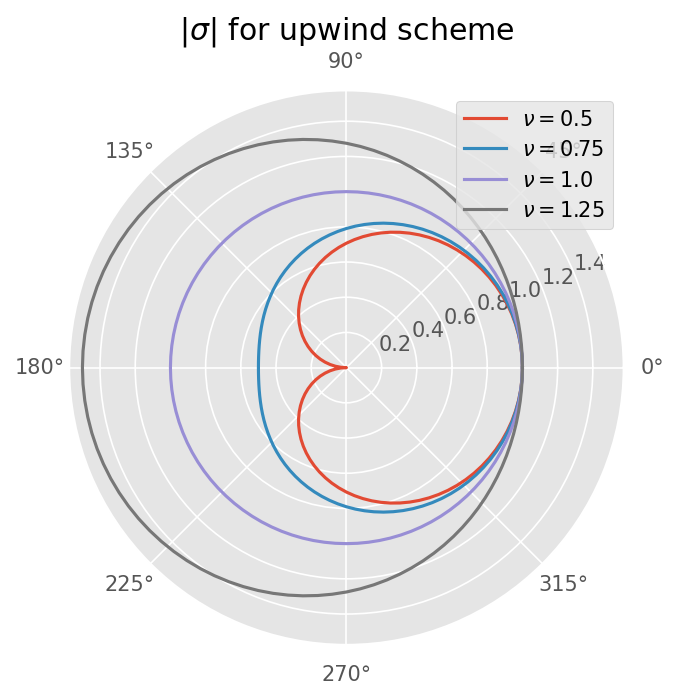

In [3]:
theta = np.linspace(0, 2*np.pi, 101)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

nus = [0.5, 0.75, 1.0, 1.25]
for nu in nus:
    sigma = 1 - nu *(1 - np.exp(-theta*1j))
    ax.plot(theta, abs(sigma))

ax.legend([r'$\nu={}$'.format(nu) for nu in nus])
ax.set_title(r'$|\sigma|$ for upwind scheme')

#### CFL condition 의미
CFL 조건 ($\nu \leq  1$)의 물리적 의미는 수치적인 Domain of Dependence가 이론적인 Domain of Depence 보다 커야 한다. 즉 파동의 전파 특성을 계산 과정에서 충분히 반영할 수 있어야 한다. 


:::{figure-md} CFL_condition
<img src="http://www.thevisualroom.com/_images/domain_of_dependence.png">

Physical meaning of CFL condition (thevisualroom.com)
:::   

## Convergence
수치적으로 구한 해가 완전해가 되려면 다음 두 조건을 만족해야 한다.

- Consistency : 격자와 시간 간격을 줄였을 때 차분식 (FDE)가 편미분 방정식 (PDE)을 근사해야 한다.

- Stability : 이론해와 차분해의 오차가 증폭되지 않아야 한다.
 
이 두 조건을 만족할 때 수치적으로 구한 해가 이론해를 수렴한다. (Lax theorem)

## 몇 가지 수치 기법

### Lax Friedrich Scheme
Central 기법에서 시간 차분시 $u_j^n$ 대신 평균값 $(u_{j+1}^n + u_{j-1}^n)/2$ 을 넣는다.

$$
u_j^{n+1} = \frac{u_{j+1}^n + u_{j-1}^n}{2} - \frac{a \Delta t}{2 \Delta x} (u_{j+1}^n - u_{j-1}^n).
$$

### Lax Wendroff Scheme
$n+1$ 시간에서 Taylor expansion을 활용하면

$$
u_j^{n+1} = u_j^n + u_t \Delta t+ \frac{1}{2!} u_{tt} \Delta t^2 + O(\Delta t^3)
$$

Wave equation 식을 이용해서 $u_t$, $u_{tt}$ 는 다음과 같이 근사할 수 있다.

$$
u_t = -a u_x \\
u_{tt} = a^2 u_{xx}
$$

이를 적용하면

$$
u_j^{n+1} = u_j^n - a \Delta t u_x + \frac{1}{2} a^2 \Delta t^2 u_{xx} + O(\Delta t^3)
$$

중앙 차분을 적용하면 다음과 같다.

$$
u_j^{n+1} = u_j^n - \frac{a \Delta t}{2 \Delta x} (u_{j+1}^n - u_{j-1}^n)
+ \frac{a^2 \Delta t^2}{2 \Delta x^2} (u_{j+1}^n -2 u_j^n + u_{j-1}^n)
$$

## 실습
- Lax Friedrich, Lax Wendroff 기법의 정확도를 Taylor expansion을 이용해서 분석해보고 Consistency 에 대해 논의하시오.


- Lax Friedrich 기법에 대해 von Neumann 안정성 분석을 수행하시오.


-  $N$ = 50 일 때 Upwind, Central, Lax Friedrich, Lax Wendroff 기법에 대해서 Sine Wave 문제를 해석하시오, $CFL$ 수는 0.5, 0.9, 1.5. 2.0 에 대해서 수행하시오.


- (Optional) Lax Wendroff 기법에 대해 von Neumann 안정성을 분석하시오.